In [11]:
# Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [219]:
df = pd.read_csv("sickness_table.csv")

In [220]:
# change column names
df.rename(
    columns={"date": "Date", 
             "n_sick": "drivers on duty that called in sick", 
             "calls": "emergency calls", 
             "n_duty": "drivers on duty available", 
             "n_sby": "standby resources available",
             "sby_need": "standby drivers activated",
             "dafted": "additional drivers needed due to not enough standbys"},
    inplace=True,
)

In [221]:
df_calls = pd.DataFrame()
df_calls['Date'] = df['Date']
df_calls['emergency calls'] = df['emergency calls']
df_calls.head()

,Date,emergency calls
0,2016-04-01,8154.0
1,2016-04-02,8526.0
2,2016-04-03,8088.0
3,2016-04-04,7044.0
4,2016-04-05,7236.0


In [222]:
# Convert 'Date' from string to date
df_calls['Date'] = pd.to_datetime(df_calls['Date'])

# set date as index
df_calls.index = pd.to_datetime(df_calls['Date'])
df_calls.drop(df_calls.filter(regex="Date"),axis=1, inplace=True)

In [223]:
df_calls.head()

,emergency calls
Date,
2016-04-01,8154.0
2016-04-02,8526.0
2016-04-03,8088.0
2016-04-04,7044.0
2016-04-05,7236.0


In [225]:
df_calls.tail()

,emergency calls
Date,
2019-05-23,8544.0
2019-05-24,8814.0
2019-05-25,9846.0
2019-05-26,9882.0
2019-05-27,8790.0


RMSE: 254.59663198738528


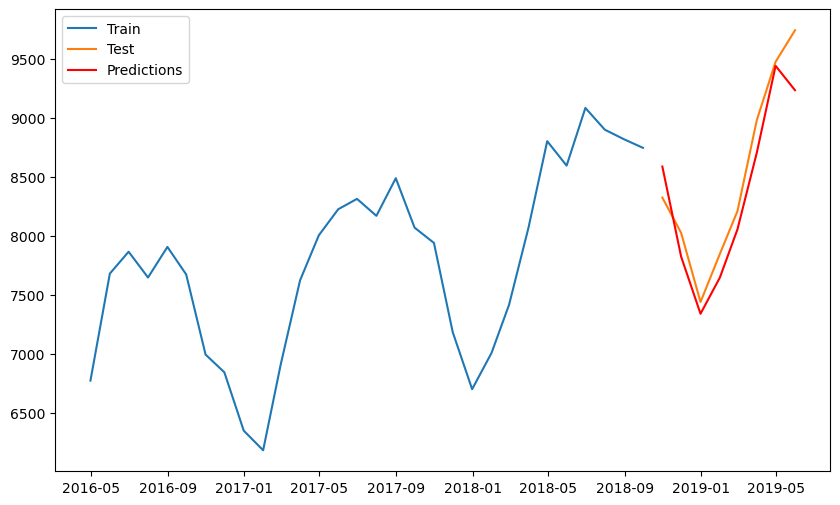

Future forecast: 2018-10-31    8589.855737
2018-11-30    7826.914237
2018-12-31    7342.432273
2019-01-31    7649.996874
2019-02-28    8057.104412
2019-03-31    8708.189330
2019-04-30    9443.257825
2019-05-31    9236.528630
2019-06-30    9726.206897
2019-07-31    9541.641249
2019-08-31    9459.179647
2019-09-30    9387.941398
Freq: M, Name: predicted_mean, dtype: float64


In [232]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
df_calls = df_calls.resample('M').mean()

# Split data into train and test sets
train_size = int(len(df_calls) * 0.8)
train, test = df_calls.iloc[:train_size], df_calls.iloc[train_size:]

# Define and fit SARIMA model
order = (1, 1, 1)  # (p, d, q) parameters for non-seasonal components
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S) parameters for seasonal components
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.legend()
plt.show()

# Forecast future emergency calls
forecast_steps = 12  # Example: forecast for 12 steps (months)
future_forecast = model_fit.forecast(steps=forecast_steps)
print('Future forecast:', future_forecast)

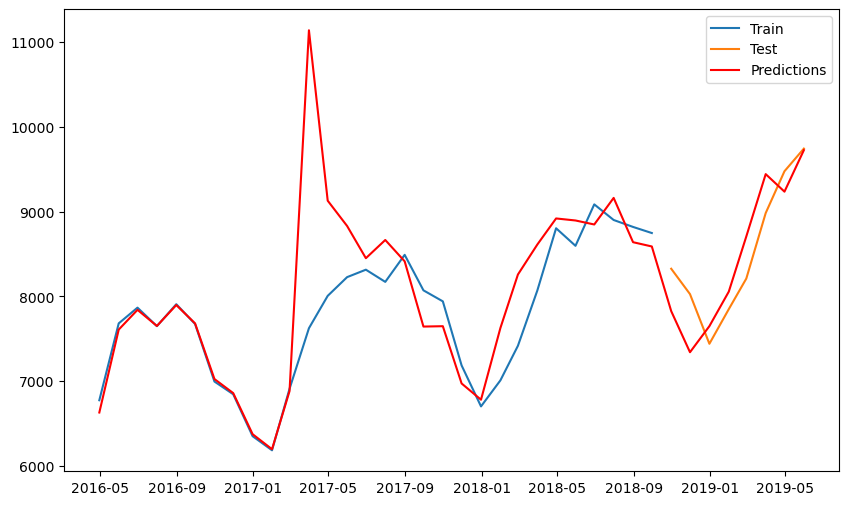

In [231]:
# Make predictions
predictions = model_fit.predict(start=1, end=len(train) + len(test), dynamic=False)

# Evaluate the model
#mse = mean_squared_error(test, predictions)
#rmse = np.sqrt(mse)
#print('RMSE:', rmse)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(data.index, predictions, label='Predictions', color='red')
plt.legend()
plt.show()

RMSE: 254.59663198738528


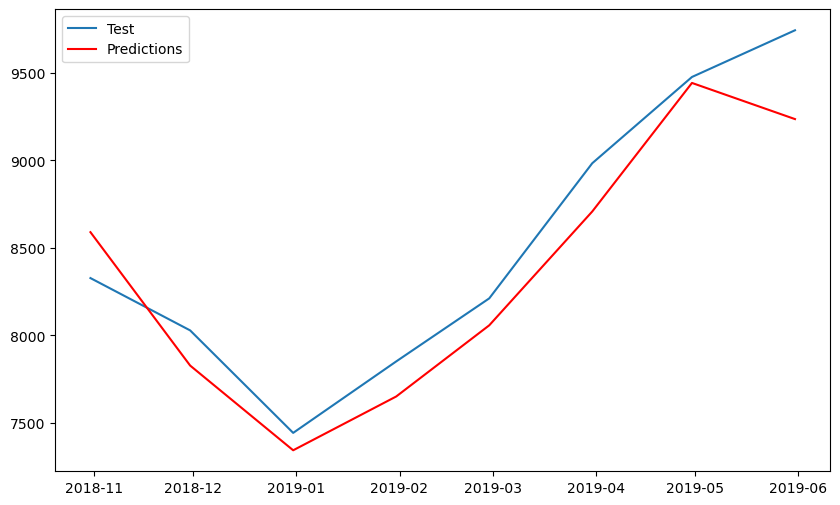

Future forecast: 2018-10-31    8589.855737
2018-11-30    7826.914237
2018-12-31    7342.432273
2019-01-31    7649.996874
2019-02-28    8057.104412
2019-03-31    8708.189330
2019-04-30    9443.257825
2019-05-31    9236.528630
2019-06-30    9726.206897
2019-07-31    9541.641249
2019-08-31    9459.179647
2019-09-30    9387.941398
Freq: M, Name: predicted_mean, dtype: float64


In [233]:
# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Plot results
#plt.plot(train.index, train, label='Train')
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.legend()
plt.show()

# Forecast future emergency calls
forecast_steps = 12  # Example: forecast for 12 steps (months)
future_forecast = model_fit.forecast(steps=forecast_steps)
print('Future forecast:', future_forecast)

In [255]:
# Make predictions
predictions1 = model_fit.predict(start=48, end=100, dynamic=False)

<Axes: >

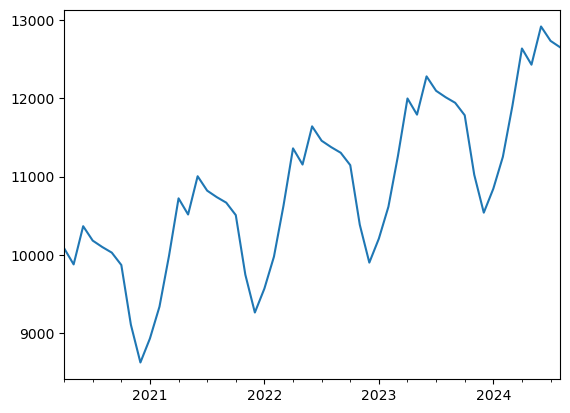

In [256]:
predictions1.plot()

In [218]:
len(test)

8